# Titanic dataset preprocessing and ML

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load data

In [4]:
train_data_original = pd.read_csv('data/train.csv')
test_data_original = pd.read_csv('data/test.csv')

In [5]:
train_data = train_data_original
test_data = test_data_original

### Analyze training and testing data

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Analyzing both datasets we can see that in the test set one column is missing. That's the "Suriveved"-column and we have to predict in in this competition

In [10]:
print(f'Number of rows in training data {train_data.shape[0]}')
print(f'Number of columns in training data {train_data.shape[1]}')
print(f'Number of rows in test data {test_data.shape[0]}')
print(f'Number of columns in test data {test_data.shape[1]}')

Number of rows in training data 891
Number of columns in training data 12
Number of rows in test data 418
Number of columns in test data 11


Check datatypes

In [11]:
train_data.info()
print("----------------------------")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

### Data visualization

Visualize the null values in the datasets.
From the number of missing values we can conclude that Cabin and Age have lot of null values, hence we can drop the rows or fill them with mean, median or similiar values.

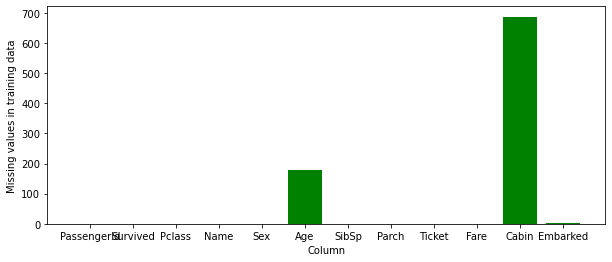

In [12]:
plt.figure(figsize = (10,4))
plt.bar(train_data.columns, train_data.isna().sum(), color='green')
plt.xlabel("Column")
plt.ylabel("Missing values in training data")
plt.show()

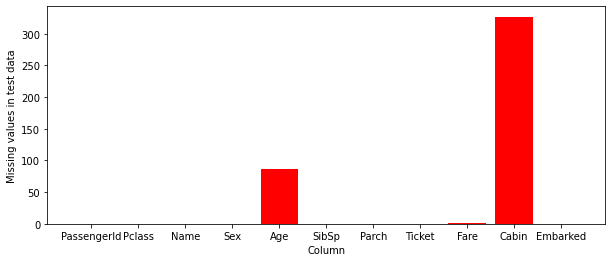

In [13]:
plt.figure(figsize = (10,4))
plt.bar(test_data.columns, test_data.isna().sum(), color='red')
plt.xlabel("Column")
plt.ylabel("Missing values in test data")
plt.show()

Number of survived passengers

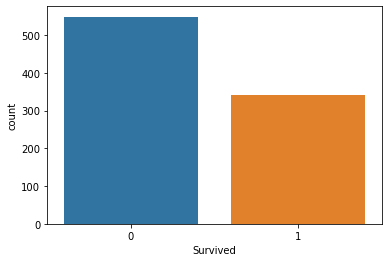

In [14]:
sns.countplot('Survived', data=train_data)
plt.show()

Number of survived related to their gender.
We can see that more female passengers survived related to male

[]

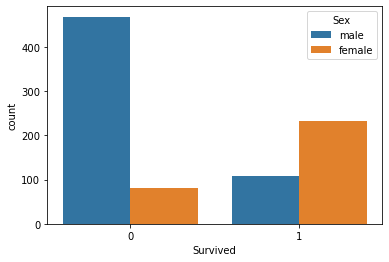

In [15]:
sns.countplot('Survived', hue='Sex', data=train_data)
plt.plot()

Number of survived related to their Pclass. We can see that people in third class are more likely to die (green bar, survived zero field)

[]

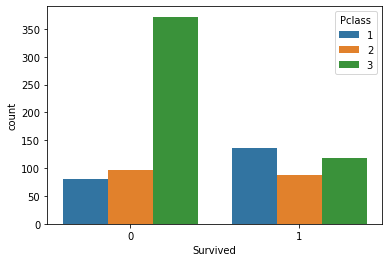

In [16]:
sns.countplot('Survived', hue='Pclass', data=train_data)
plt.plot()

### Histogram

Distribution of Age. We can see that the most frequent age was between 20-30 years

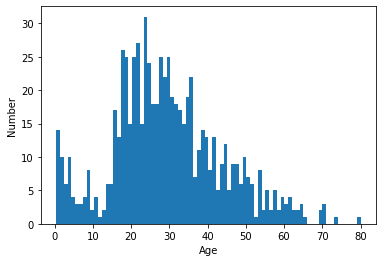

In [17]:
interval = 1
value_for_bin = np.ceil((train_data.Age.max() - train_data.Age.min()) / interval).astype(int)

plt.hist(train_data.Age, bins = value_for_bin)
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

#without the interval steps above
#plt.hist(train_data.Age)
#plt.xlabel("Age")
#plt.ylabel("Number")
#plt.show()
#'''

Distribution of Fare. We can se that most of the people paid between 0 and 50$ (I guess it was not €)

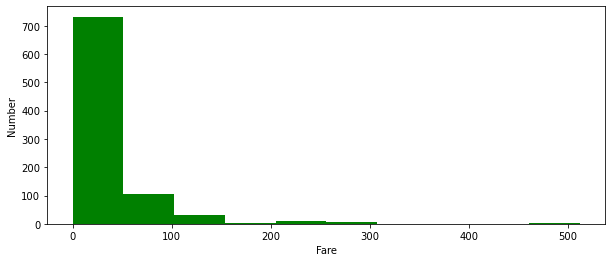

In [18]:
plt.figure(figsize = (10,4))
plt.hist(train_data.Fare, bins = 10, color = 'green')
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()

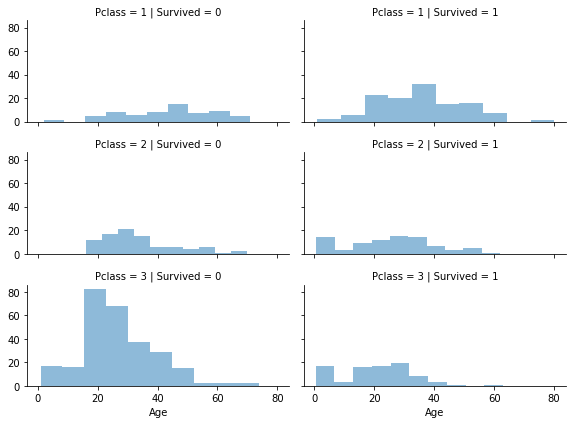

In [19]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.0, aspect=2.0)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend()
plt.show()

### Correlation Matrix

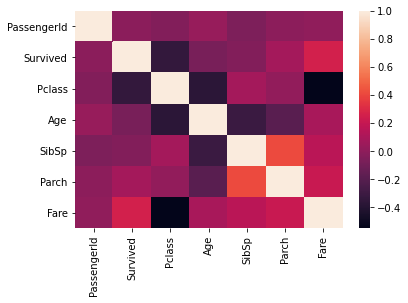

In [20]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()
# this shows that SibSp and Parch columns are quite related (tends to brighter orange 0.5-0.6), so we might combine these two columns to reduce the dimension of our data --> works only for numerical data 

### Simple Data Analysis

Survival rate of Gender

In [21]:
((train_data.groupby(['Sex','Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [22]:
((train_data.groupby(['Pclass','Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count())

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

### Missing values

In [23]:
# drop Cabin column first (there are lot of missing values)
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [24]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 30)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
******************************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
******************************


In [25]:
# filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
    
# from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
train_data.Embarked.fillna('S', inplace = True)

### Converting categorical feature (gender & embarked)

In [26]:
def conv_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(conv_gender)
test_data.Sex = test_data.Sex.apply(conv_gender)

In [27]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

### Dropping PassengerId, Name and Ticket

In [28]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)

columns_to_drop = ['Name', 'Ticket']
test_data.drop(columns_to_drop, axis = 1, inplace = True)

### Preparing training and testing data

In [29]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data

#### Split training data into train and test

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 10)

print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (712, 7)
Shape of y_train (712,)
Shape of x_test (179, 7)
Shape of y_test (179,)


### Save preprocessed data to file

In [31]:
combined_trained_data = pd.concat((X_train,Y_train), axis=1, join='inner')

In [32]:
submission = pd.DataFrame(combined_trained_data)
submission.to_csv('data/titanic_train_preprocessed.csv', index=False)

submission = pd.DataFrame(X_test)
submission.to_csv('data/titanic_test_preprocessed.csv', index=False)

### Drop PassengerID for X_test to have same number of columns

In [33]:
columns_to_drop = ['PassengerId']
test_data.drop(columns_to_drop, axis = 1, inplace = True)

### Perform algorithms

#### Logistic Regression

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#logreg.score(x_test, y_test)

#Result with splitted original training data set to train and test part (x_train, y_train, x_test, y_test)
#0.8324022346368715

#### Support Vector Machine

In [35]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
#svc.score(x_test, y_test)

#Result with splitted original training data set to train and test part (x_train, y_train, x_test, y_test)
#0.7262569832402235

#### Random Forest

In [41]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
#random_forest.score(x_train, y_train)

#Result with splitted original training data set to train and test part (x_train, y_train, x_test, y_test)
#0.9803370786516854

In [37]:
important_features_dict = {}
for x,i in enumerate(random_forest.feature_importances_):
    important_features_dict[x]=i


important_features_idx = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'Most important features: {important_features_idx}')

Most important features: [5, 1, 2, 0, 3, 4, 6]


In [38]:
importances = random_forest.feature_importances_
indices = np.argsort((importances))[:]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f' {[X_train.columns[important_features_idx[f]]]}\t\t{importances[important_features_idx[f]]}')

Feature ranking:
 ['Fare']		0.27039258830874013
 ['Sex']		0.26399966671163233
 ['Age']		0.26158629124450733
 ['Pclass']		0.08266463894162744
 ['SibSp']		0.04968781854516538
 ['Parch']		0.03762550822243215
 ['Embarked']		0.0340434880258952


#### KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#knn.score(x_train, y_train)

#Result with splitted original training data set to train and test part (x_train, y_train, x_test, y_test)
#0.848314606741573

#### Gaussian Naive Bayes

In [40]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
#gaussian.score(x_train, y_train)

#Result with splitted original training data set to train and test part (x_train, y_train, x_test, y_test)
#0.7907303370786517 

### Prepare CSV for submission

In [42]:
submission = pd.DataFrame({
        "PassengerId": test_data_original["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('data/titanic.csv', index=False)

In [43]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [44]:
submission.shape

(418, 2)